# Titanic Datasets Prediction Using Logistic Regression

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [3]:
train=pd.read_csv('C:\\Users\\deepu\\Videos\\[CN] Machine Learning\\12. Project - Logistic Regression\\train.csv')
test=pd.read_csv('C:\\Users\\deepu\\Videos\\[CN] Machine Learning\\12. Project - Logistic Regression\\test.csv')

In [4]:
pandas_profiling.ProfileReport(train)

In [5]:
pandas_profiling.ProfileReport(test)

In [6]:
train.keys()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

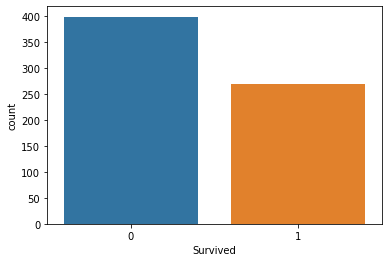

In [7]:
sns.countplot('Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

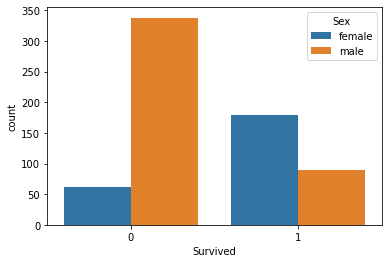

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

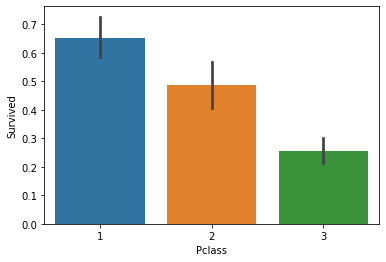

In [12]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [13]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [14]:
train.describe()

Pclass         Age       SibSp       Parch        Fare    Survived
count  668.000000  536.000000  668.000000  668.000000  668.000000  668.000000
mean     2.296407   29.700560    0.528443    0.407186   32.064552    0.402695
std      0.831638   14.240257    1.080327    0.854695   45.320835    0.490808
min      1.000000    0.670000    0.000000    0.000000    0.000000    0.000000
25%      2.000000   21.000000    0.000000    0.000000    7.925000    0.000000
50%      3.000000   29.000000    0.000000    0.000000   14.750000    0.000000
75%      3.000000   38.250000    1.000000    0.000000   31.275000    1.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200    1.000000

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [16]:
mean=train['Age'].mean()

In [17]:
train['Age']=train['Age'].fillna(mean)

In [19]:
train['Embarked']=train['Embarked'].fillna('S')
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [22]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarke=pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train

Pclass                                            Name     Sex       Age  \
0         2   Weisz, Mrs. Leopold (Mathilde Francoise Pede)  female  29.00000   
1         3               Williams, Mr. Howard Hugh "Harry"    male  29.70056   
2         2  Morley, Mr. Henry Samuel ("Mr Henry Marshall")    male  39.00000   
3         3     Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.00000   
4         3                          Sutehall, Mr. Henry Jr    male  25.00000   
..      ...                                             ...     ...       ...   
663       2                             Ilett, Miss. Bertha  female  17.00000   
664       3                        Morrow, Mr. Thomas Rowan    male  29.70056   
665       3                                   Bing, Mr. Lee    male  32.00000   
666       3                     Strandberg, Miss. Ida Sofia  female  22.00000   
667       3                  Murphy, Miss. Katherine "Kate"  female  29.70056   

     SibSp  Parch           Ticket     Fare Embarked  Survived  
0        1      0           228414  26.0000        S         1  
1        0      0         A/5 2466   8.0500        S         0  
2        0      0           250655  26.0000        S         0  
3        0      4           349909  21.0750        S         0  
4        0      0  SOTON/OQ 392076   7.0500        S         0  
..     ...    ...              ...      ...      ...       ...  
663      0      0       SO/C 14885  10.5000        S         1  
664      0      0           372622   7.7500        Q         0  
665      0      0             1601  56.4958        S         1  
666      0      0             7553   9.8375        S         0  
667      1      0           367230  15.5000        Q         1  

[668 rows x 10 columns]

In [24]:
train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [25]:
train.head()

Pclass       Age  SibSp  Parch    Fare  Survived
0       2  29.00000      1      0  26.000         1
1       3  29.70056      0      0   8.050         0
2       2  39.00000      0      0  26.000         0
3       3  29.00000      0      4  21.075         0
4       3  25.00000      0      0   7.050         0

In [26]:
train=pd.concat([train,sex,embarke],axis=1)

In [27]:
train.head()

Pclass       Age  SibSp  Parch    Fare  Survived  male  Q  S
0       2  29.00000      1      0  26.000         1     0  0  1
1       3  29.70056      0      0   8.050         0     1  0  1
2       2  39.00000      0      0  26.000         0     1  0  1
3       3  29.00000      0      4  21.075         0     0  0  1
4       3  25.00000      0      0   7.050         0     1  0  1

In [29]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf=LogisticRegression()

In [33]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred=clf.predict(x_test)

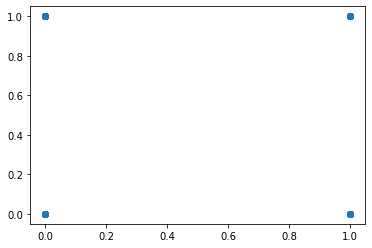

In [39]:
plt.scatter(y_test,y_pred)
plt.show()

In [41]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)